In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def image_enhancement(image):
    if image is None:
        raise ValueError("Input image is None.")
    
    # Convert image to YUV color space
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    y, u, v = cv2.split(yuv)
    
    # Apply histogram equalization to the Y channel
    y_eq = cv2.equalizeHist(y)
    
    # Merge channels back
    yuv_eq = cv2.merge([y_eq, u, v])
    enhanced_image = cv2.cvtColor(yuv_eq, cv2.COLOR_YUV2BGR)
    
    return enhanced_image

def image_noise_removal(image):
    if image is None:
        raise ValueError("Input image is None.")
    
    # Apply Gaussian blur to remove noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    return blurred_image


In [3]:

def image_restoration(image):
    if image is None:
        raise ValueError("Input image is None.")
    
    # Restore image using inpainting for occlusions
    mask = np.zeros(image.shape[:2], np.uint8)
    mask[50:150, 50:150] = 255  # Example mask area for inpainting
    
    restored_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    
    return restored_image

def morphological_operations(image):
    if image is None:
        raise ValueError("Input image is None.")
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Define kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)
    
    # Apply morphological operations
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    return opening, closing

def image_encoding_compression(image, filename='compressed_image.jpg'):
    if image is None:
        raise ValueError("Input image is None.")
    
    # Encode image to JPEG format with compression
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 90]
    result, encoded_image = cv2.imencode('.jpg', image, encode_param)
    
    if result:
        with open(filename, 'wb') as f:
            f.write(encoded_image.tobytes())
        return filename
    else:
        raise ValueError("Failed to encode image.")


In [4]:

def count_objects(image):
    if image is None:
        raise ValueError("Input image is None.")
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on the original image (for visualization)
    image_with_contours = image.copy()
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
    
    # Number of objects is the number of contours
    num_objects = len(contours)
    
    return num_objects, image_with_contours


In [5]:
def display_image(title, image):
    """ Utility function to display an image using matplotlib """
    plt.figure(figsize=(8,6))
    if len(image.shape) == 3:  # Color image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:  # Grayscale image
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


Enhanced image shape: (1200, 1600, 3)


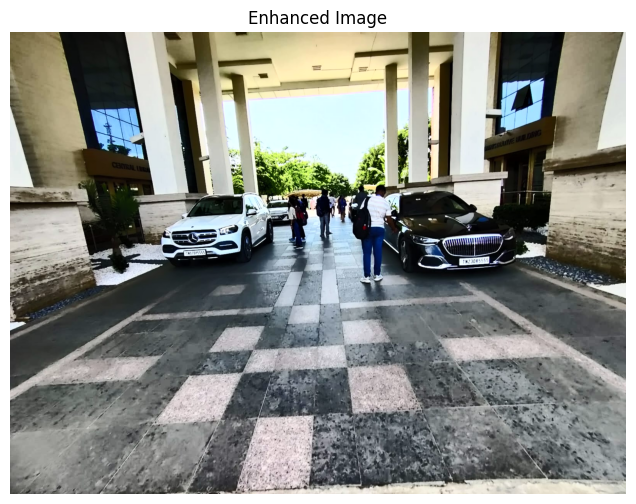

Noise removed image shape: (1200, 1600, 3)


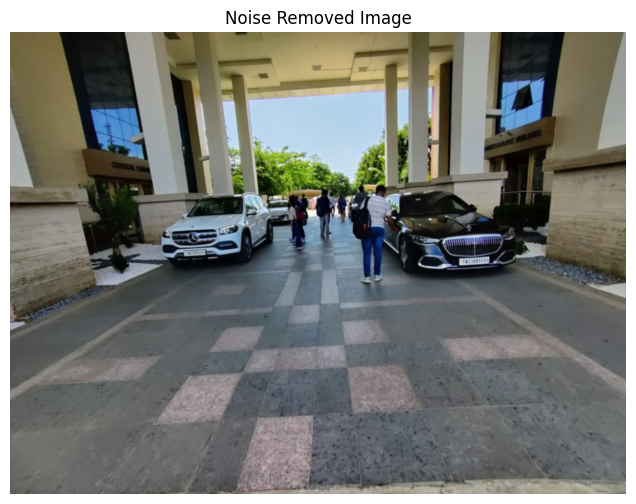

Restored image shape: (1200, 1600, 3)


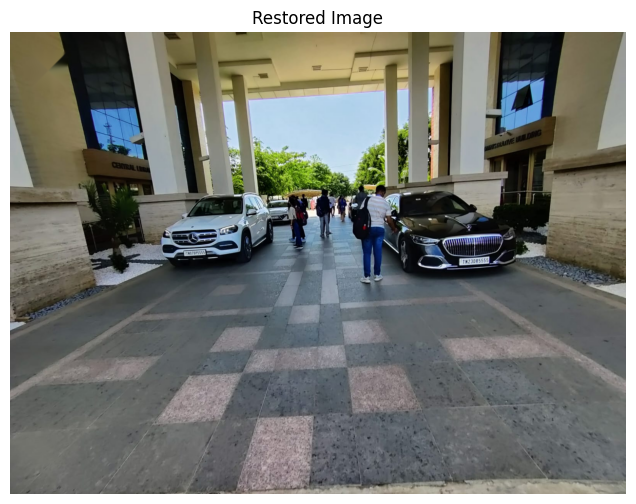

Morphological Opening shape: (1200, 1600)
Morphological Closing shape: (1200, 1600)


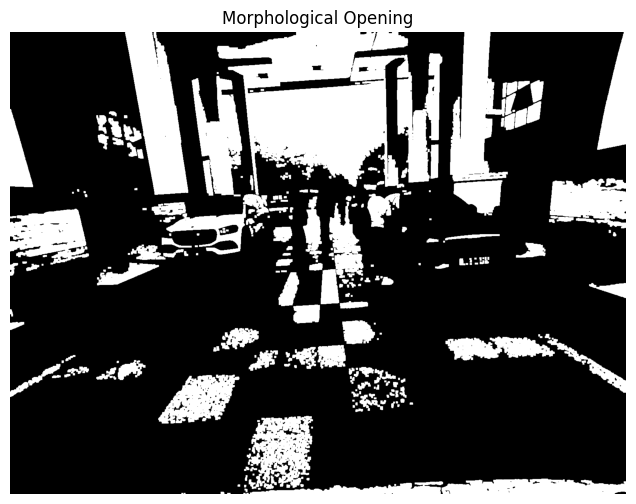

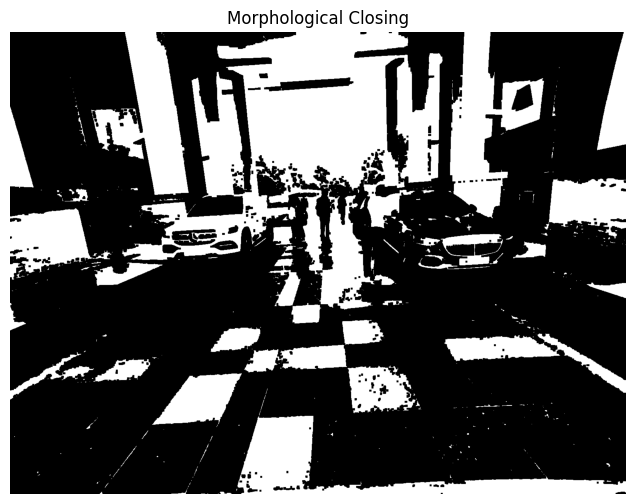

Compressed image saved to compressed_image.jpg


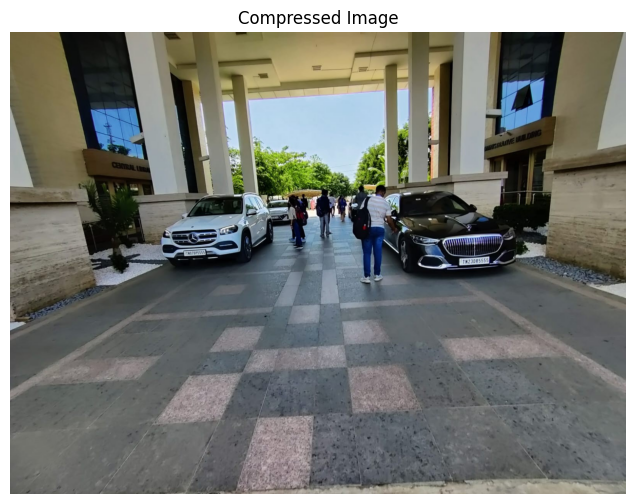

Number of objects detected: 1372


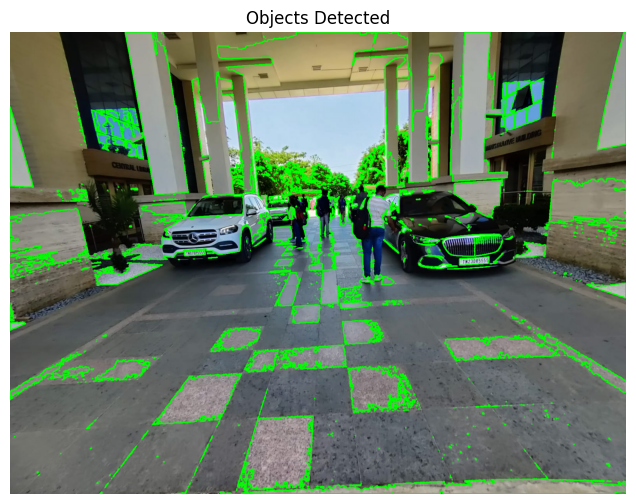

In [6]:
def main():
    # Load an image
    image_path = r"C:\Users\abhi1\Downloads\WhatsApp Image 2024-08-18 at 18.36.52_96d4e0eb.jpg"  # Replace with your image file path
    image = cv2.imread(image_path)
    
    if image is None:
        raise ValueError(f"Failed to load image from path: {image_path}")
    
    # Image Enhancement
    enhanced_image = image_enhancement(image)
    if enhanced_image is None:
        raise ValueError("Enhanced image is None.")
    print("Enhanced image shape:", enhanced_image.shape)
    display_image('Enhanced Image', enhanced_image)
    
    # Image Noise Removal
    noise_removed_image = image_noise_removal(image)
    if noise_removed_image is None:
        raise ValueError("Noise removed image is None.")
    print("Noise removed image shape:", noise_removed_image.shape)
    display_image('Noise Removed Image', noise_removed_image)
    
    # Image Restoration
    restored_image = image_restoration(image)
    if restored_image is None:
        raise ValueError("Restored image is None.")
    print("Restored image shape:", restored_image.shape)
    display_image('Restored Image', restored_image)
    
    # Morphological Operations
    opening, closing = morphological_operations(image)
    if opening is None or closing is None:
        raise ValueError("Morphological operations failed.")
    print("Morphological Opening shape:", opening.shape)
    print("Morphological Closing shape:", closing.shape)
    display_image('Morphological Opening', opening)
    display_image('Morphological Closing', closing)
    
    # Image Encoding and Compression
    compressed_image_path = image_encoding_compression(image)
    print(f'Compressed image saved to {compressed_image_path}')
    compressed_image = cv2.imread(compressed_image_path)
    if compressed_image is None:
        raise ValueError(f"Failed to load compressed image from path: {compressed_image_path}")
    display_image('Compressed Image', compressed_image)
    
    # Count Objects
    num_objects, image_with_objects = count_objects(image)
    print(f'Number of objects detected: {num_objects}')
    display_image('Objects Detected', image_with_objects)
    
# Execute the main function
main()
